In [1]:
# DSC 630
# Milestone1 Week 9
# Author :  Akila Selvaraj
# Created Date : 10/29/2022

# Change log
# Author: Akila Selvaraj
# Description : Initial version

<div class="alert-success">
Credit card Approval Prediction
</div>

In this project, we are going to build a model for Credit card approval Prediction.

In [2]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
import itertools
import warnings
warnings.filterwarnings("ignore")

In [3]:
###scikit Learn Modules needed 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OneHotEncoder,StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [4]:
# Extracting the dataset needed 
app_df = pd.read_csv("application_record.csv") # This dataset has data related to customer applications
crecord_df = pd.read_csv("credit_record.csv") # This dataset has credit record information

In [5]:
#Application data info
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [6]:
#Credit record info
crecord_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [7]:
# checking to see how many records match in two datasets
len(set(crecord_df['ID']).intersection(set(app_df['ID']))) 

36457

<AxesSubplot:>

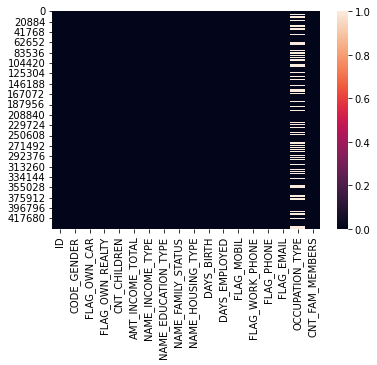

In [8]:
# Heatmap toidentfy if there are any null values
sns.heatmap(app_df.isnull())

In [9]:
# checking for null values. Seems like occupation_type has many
app_df.isna().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

<AxesSubplot:>

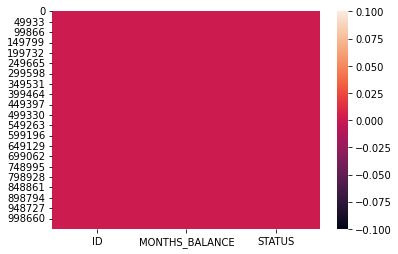

In [10]:
# heatmap to check if there are any null values in credit dataset
sns.heatmap(crecord_df.isnull())

In [11]:
# checking for null values in credit dataset
crecord_df.isna().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

There are no null values in credit dataset.

In [12]:
# Merging both the datasets bases on ID
cc_app_df=pd.merge(app_df,crecord_df,on='ID')
print(cc_app_df.info(),"\n\n")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  object 
 2   FLAG_OWN_CAR         777715 non-null  object 
 3   FLAG_OWN_REALTY      777715 non-null  object 
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  object 
 7   NAME_EDUCATION_TYPE  777715 non-null  object 
 8   NAME_FAMILY_STATUS   777715 non-null  object 
 9   NAME_HOUSING_TYPE    777715 non-null  object 
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_MOBIL           777715 non-null  int64  
 13  FLAG_WORK_PHONE      777715 non-null  int64  
 14  FLAG_PHONE           777715 non-null  int64  
 15  FLAG_EMAIL       

In [13]:
cc_app_df.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE
count,7.777150e+05,777715.000000,7.777150e+05,777715.000000,777715.000000,777715.0,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000
mean,5.078743e+06,0.428082,1.885348e+05,-16124.937046,57775.825016,1.0,0.231818,0.300965,0.091675,2.208837,-19.373564
std,4.180442e+04,0.745755,1.016225e+05,4104.304018,136471.735391,0.0,0.421993,0.458678,0.288567,0.907380,14.082208
min,5.008804e+06,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000
25%,5.044568e+06,0.000000,1.215000e+05,-19453.000000,-3292.000000,1.0,0.000000,0.000000,0.000000,2.000000,-29.000000
50%,5.069530e+06,0.000000,1.620000e+05,-15760.000000,-1682.000000,1.0,0.000000,0.000000,0.000000,2.000000,-17.000000
75%,5.115551e+06,1.000000,2.250000e+05,-12716.000000,-431.000000,1.0,0.000000,1.000000,0.000000,3.000000,-8.000000
max,5.150487e+06,19.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000


In [14]:
# Checking for number of null values after joining both the datasets
cc_app_df.isna().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        240048
CNT_FAM_MEMBERS             0
MONTHS_BALANCE              0
STATUS                      0
dtype: int64

We are going to plot histogram of few variables to see the distribution

Text(0, 0.5, 'Count')

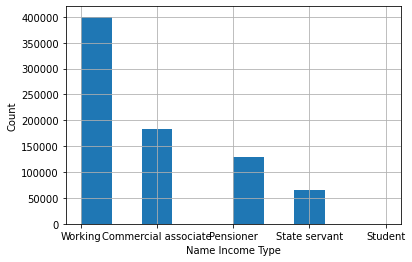

In [15]:
# Histogram of income type
cc_app_df['NAME_INCOME_TYPE'].hist()
plt.xlabel('Name Income Type')
plt.ylabel('Count')

Above plot is the histogram of income type which shows that Working commercials applications are more and credit card applications from students are less.

<AxesSubplot:>

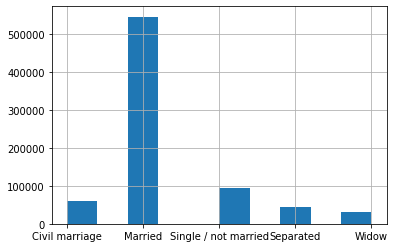

In [16]:
# Histogram of Name Family status
cc_app_df['NAME_FAMILY_STATUS'].hist()

Above is the histogram of Family status. Distributions of married is more than Not married/Widow.

<AxesSubplot:>

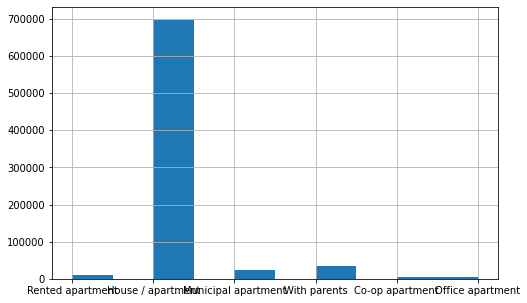

In [17]:
# Histogram of Name Housing Type
plt.figure(figsize=(8,5))
cc_app_df['NAME_HOUSING_TYPE'].hist()

Above is the histogram of Housing Type.

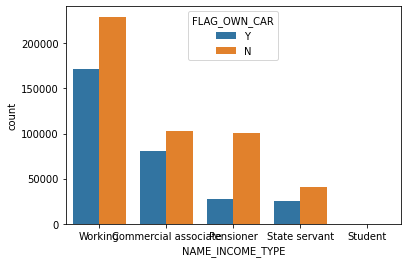

In [18]:
from pylab import rcParams
sns.countplot(x='NAME_INCOME_TYPE',hue='FLAG_OWN_CAR',data=cc_app_df)
rcParams['figure.figsize'] = 20, 5

Above graph shows the count plot of Income type. In each income type applications, count of people who has no car is more than who got car.

<AxesSubplot:xlabel='OCCUPATION_TYPE', ylabel='count'>

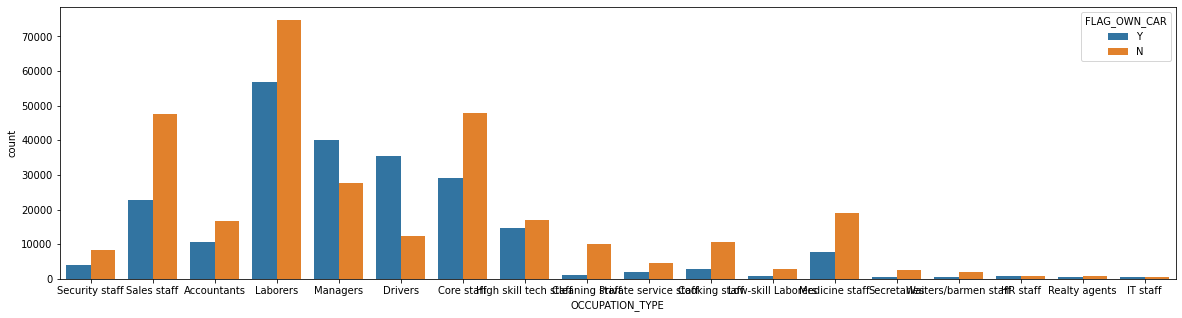

In [19]:
sns.countplot(x='OCCUPATION_TYPE',hue='FLAG_OWN_CAR',data=cc_app_df)

Above one is the another countplot to see the distribution of occupation type and if they own car. Application from labourers are more. This gives an overall idea of each occupation type and if they own car.

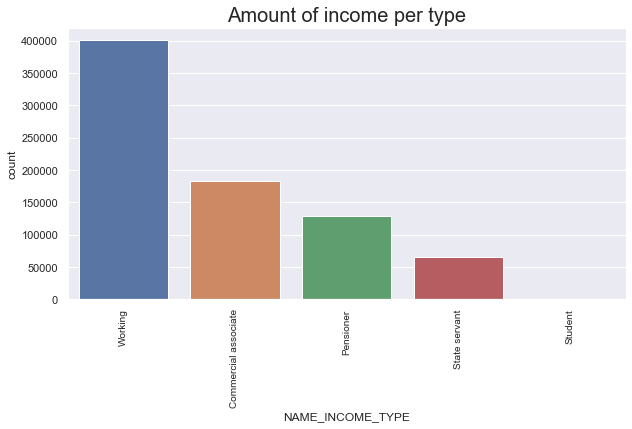

In [20]:
sns.set(rc={'figure.figsize':(10,5)})
plt.xticks(fontsize=10,rotation='vertical')
p=sns.countplot(cc_app_df['NAME_INCOME_TYPE'],hue_order=cc_app_df.groupby('NAME_INCOME_TYPE'))
p.axes.set_title("Amount of income per type",fontsize=20)
plt.show()

(19.951, 24.8]    0.012404
(24.8, 29.6]      0.103150
(29.6, 34.4]      0.139630
(34.4, 39.2]      0.147854
(39.2, 44.0]      0.148778
(44.0, 48.8]      0.096960
(48.8, 53.6]      0.115922
(53.6, 58.4]      0.108177
(58.4, 63.2]      0.091882
(63.2, 68.0]      0.035244
Name: Age, dtype: float64


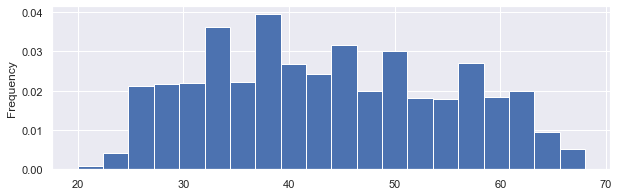

In [21]:
# Age
# Bucketing Continuous Variables
sns.set(rc={'figure.figsize':(10,3)})
cc_app_df['Age']=-(cc_app_df['DAYS_BIRTH'])//365
print(cc_app_df['Age'].value_counts(bins=10,normalize=True,sort=False))
cc_app_df['Age'].plot(kind='hist',bins=20,density=True)
plt.show()

Above plot shows the distribution of age in the dataset. People who submits credit card application fall between the age of 25 to 65.

(2.544, 18.18]      472222
(18.18, 33.66]      246863
(33.66, 49.14]       47802
(49.14, 64.62]        5746
(64.62, 80.1]         3512
(80.1, 95.58]         1209
(95.58, 111.06]         26
(111.06, 126.54]        83
(126.54, 142.02]       102
(142.02, 157.5]        150
Name: AMT_INCOME_TOTAL1, dtype: int64


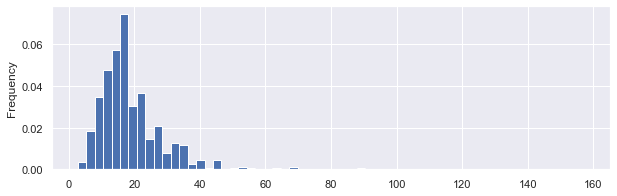

In [22]:
# Annual Income
# bins the data based on sample quantiles
sns.set(rc={'figure.figsize':(10,3)})
cc_app_df['AMT_INCOME_TOTAL1']=cc_app_df['AMT_INCOME_TOTAL'].astype(object)
cc_app_df['AMT_INCOME_TOTAL1'] = cc_app_df['AMT_INCOME_TOTAL']/10000 
print(cc_app_df['AMT_INCOME_TOTAL1'].value_counts(bins=10,sort=False))
cc_app_df['AMT_INCOME_TOTAL1'].plot(kind='hist',bins=60,density=True)
plt.show()
cc_app_df = cc_app_df.drop('AMT_INCOME_TOTAL1', axis=1)

<AxesSubplot:ylabel='Frequency'>

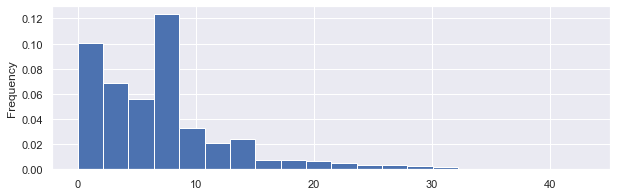

In [23]:
# Working Years
# Equal-length Bucketing
cc_app_df['YEARS_EMPLOYED']=-(cc_app_df['DAYS_EMPLOYED'])//365
cc_app_df[cc_app_df['YEARS_EMPLOYED']<0] = np.nan # replace by na
cc_app_df['DAYS_EMPLOYED']
cc_app_df['YEARS_EMPLOYED'].fillna(cc_app_df['YEARS_EMPLOYED'].mean(),inplace=True) #replace na by mean
cc_app_df['YEARS_EMPLOYED'].plot(kind='hist',bins=20,density=True)

To find the experience of the candidates, I have calculated their years of experience from days employed. People who requests for credit card are mostly employed for less than 10 years. After 10 years, we can see that customers requesting for credit card became less , probably that could be because they already have credit card and applying for another.

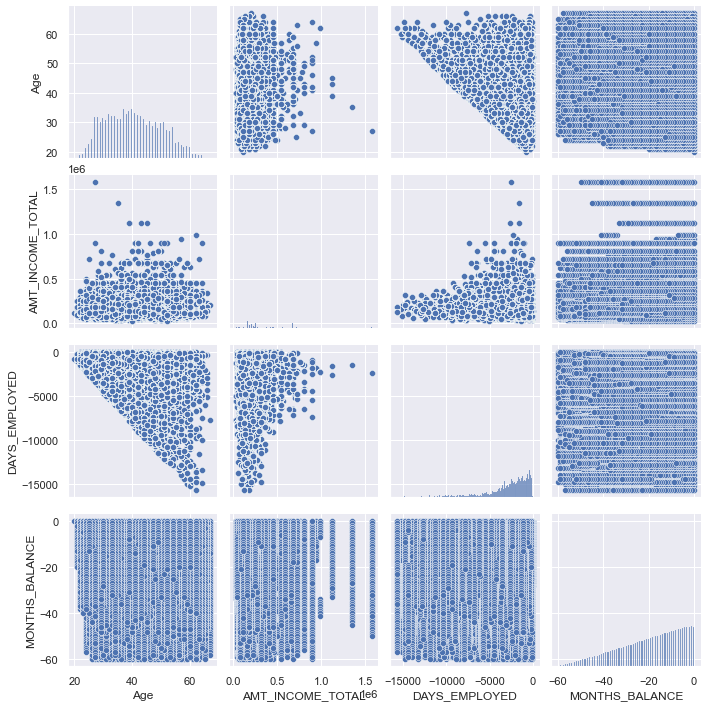

In [24]:
# SNS pairplot of Age, Years Employed, Credit Score, Income
sns.pairplot(cc_app_df, vars=['Age','AMT_INCOME_TOTAL','DAYS_EMPLOYED','MONTHS_BALANCE'],diag_kind='hist', palette='hls')
plt.show()

Pair plot shows the relationship between few of the continuos variables

plotting the heatmap for correlation

<AxesSubplot:>

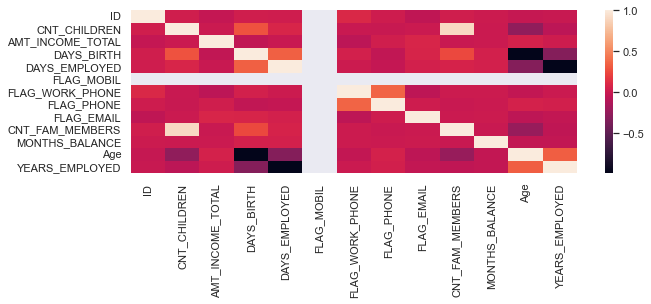

In [25]:
cormat = cc_app_df.corr()
round(cormat,2)
sns.heatmap(cormat)

<AxesSubplot:>

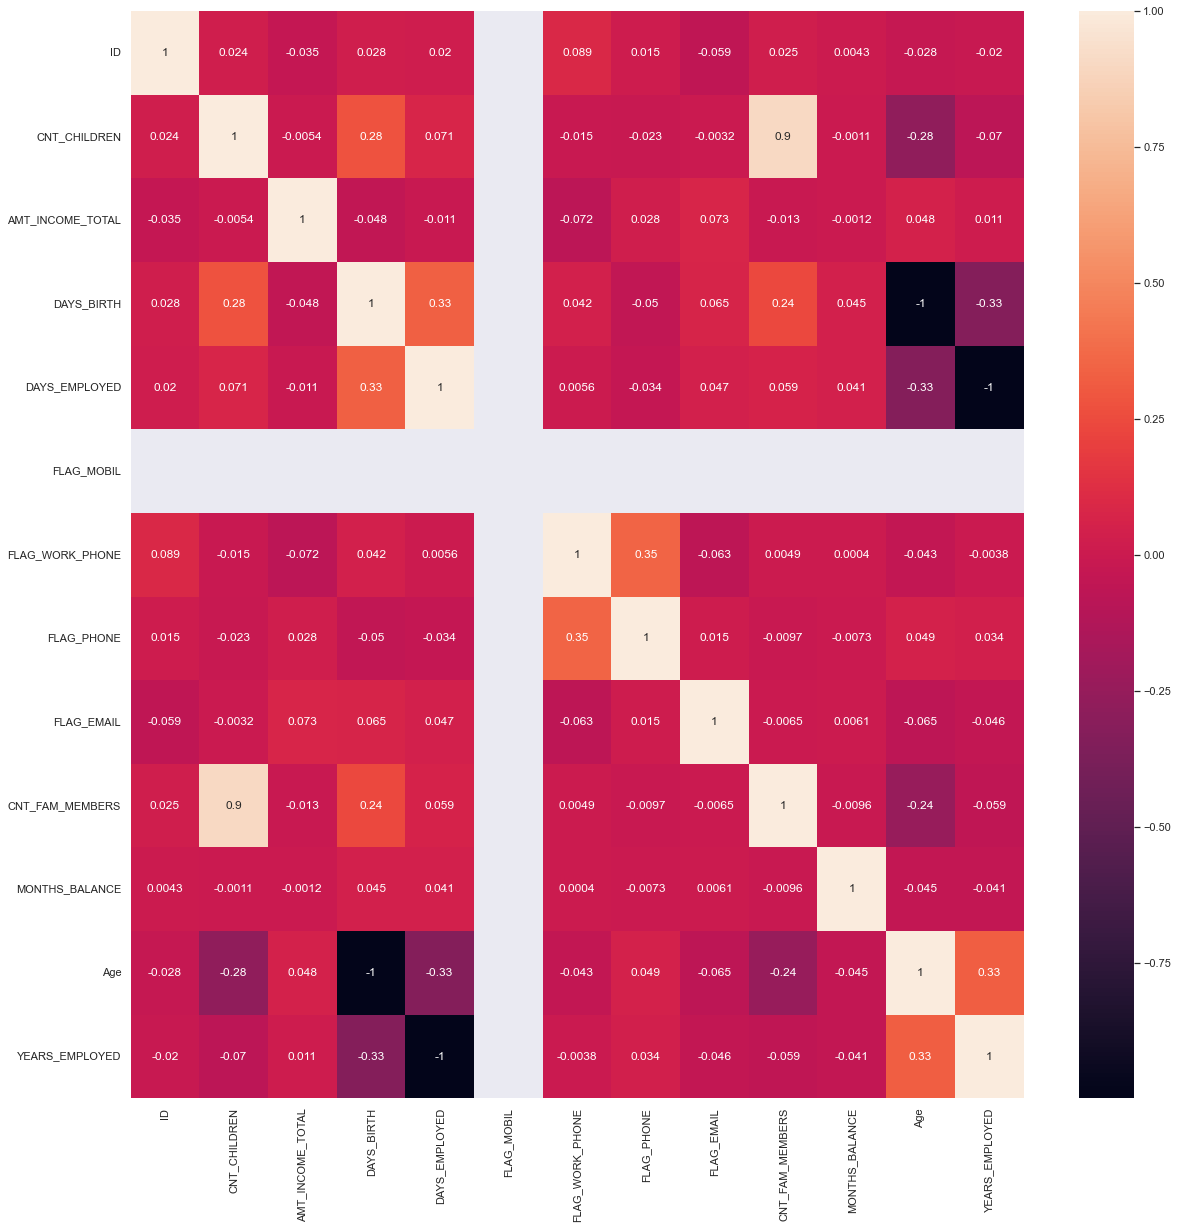

In [26]:
corr = cc_app_df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True)

    To identify if there are any null variables, we did a heat map which showed that attribute occupation has more null values. We have to handle this missing values before applying the model. <br> 
    <br>From the histogram and plots we plotted, we can say that applications from Male are more than female applicants. Applications who have been employed for less than 10 years are applying for credit card more than the applicants who have been employed greater than 10 years. People with income between 25k to 45k are applying more than people with less or more income. People who were married are applying for credit card than the other individuals. We can also say that need for credit card is more for working population than other income types. We also did some plots to check if they have car. That gives us an idea of which set of people who are applying for credit card has car.     
        <br> We did a pair plot to find the relationship between numerical variables. Number of days employed and age are positively correlated and it shows clearly that older people were employed for more number if years than younger ones. However, we could not see any direct relationship other set of variables. <br>     
        Correlation matrix shows how all the variables are correlated to each other. Some of the variables in this dataset are flags and our target variable also needs some transformation. We will perform some transformation in milestone 2 for this target variable and then we will find how the variables are correlated with target variable.

**Dropping unwanted data**

We are going to drop unwanted data in the dataset before building the model. Field FLAG_MOBIL has just single value 1 and it doesn't add any value to the model. Also, field occupation has more missing values. Column ID has unique key column. So, I will be dropping those columns. 

In [27]:
cc_app_df.drop( columns = ['FLAG_MOBIL'],inplace=True)
cc_app_df.dropna(subset=['OCCUPATION_TYPE'],inplace=True)
cc_app_df.dropna(subset=['ID'],inplace=True)
cc_app_df.drop_duplicates(subset=cc_app_df.columns[1:],inplace=True)

In [28]:
# Checking how many values are unique in our target variable STATUS
pd.unique(cc_app_df['STATUS'])

array(['C', 'X', '0', '1', '5', '4', '3', '2'], dtype=object)

In [29]:
cc_app_df['STATUS']

31        C
32        C
33        C
34        C
35        C
         ..
777710    0
777711    2
777712    1
777713    0
777714    0
Name: STATUS, Length: 324119, dtype: object

In [30]:
# Convert status values to binary (2,3,4,5 to 1 'Bad' and 0 to Good)
# replace the value C and X with 0 as it is the same type
# 1,2,3,4,5 are classified as 1 because they are the same type
# these will be our labels/prediction results for our model
def status(s):
    if s == "C":
        return 0
    elif s == "X":
        return 0
    elif s == '0':
        return 0
    elif s == '1':
        return 0
    elif s == '2':
        return 1
    elif s == '3':
        return 1
    elif s == '4':
        return 1
    elif s == '5':
        return 1

In [31]:
cc_app_df['STATUS'] = cc_app_df['STATUS'].apply(lambda x:status(x))
cc_app_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,Age,YEARS_EMPLOYED
31,5008806.0,M,Y,Y,0.0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,-1134.0,0.0,0.0,0.0,Security staff,2.0,0.0,0,58.0,3.0
32,5008806.0,M,Y,Y,0.0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,-1134.0,0.0,0.0,0.0,Security staff,2.0,-1.0,0,58.0,3.0
33,5008806.0,M,Y,Y,0.0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,-1134.0,0.0,0.0,0.0,Security staff,2.0,-2.0,0,58.0,3.0
34,5008806.0,M,Y,Y,0.0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,-1134.0,0.0,0.0,0.0,Security staff,2.0,-3.0,0,58.0,3.0
35,5008806.0,M,Y,Y,0.0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,-1134.0,0.0,0.0,0.0,Security staff,2.0,-4.0,0,58.0,3.0


In [34]:
# Checking skewness
cc_app_df.skew()

ID                   0.065748
CNT_CHILDREN         2.754167
AMT_INCOME_TOTAL     2.884853
DAYS_BIRTH          -0.233372
DAYS_EMPLOYED       -1.689395
FLAG_WORK_PHONE      1.007321
FLAG_PHONE           0.891319
FLAG_EMAIL           2.688208
CNT_FAM_MEMBERS      1.463995
MONTHS_BALANCE      -0.491201
STATUS              13.394174
Age                  0.235453
YEARS_EMPLOYED       1.683871
dtype: float64

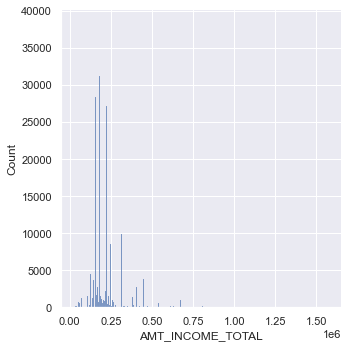

In [35]:
#Handling outliers
# Plotting amount income total to find if there are any outliers
sns.displot(cc_app_df, x="AMT_INCOME_TOTAL")

<AxesSubplot:>

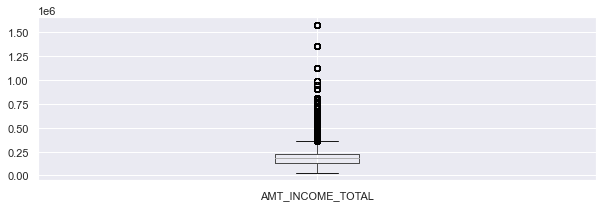

In [36]:
cc_app_df.boxplot('AMT_INCOME_TOTAL')

<AxesSubplot:xlabel='ID', ylabel='CNT_FAM_MEMBERS'>

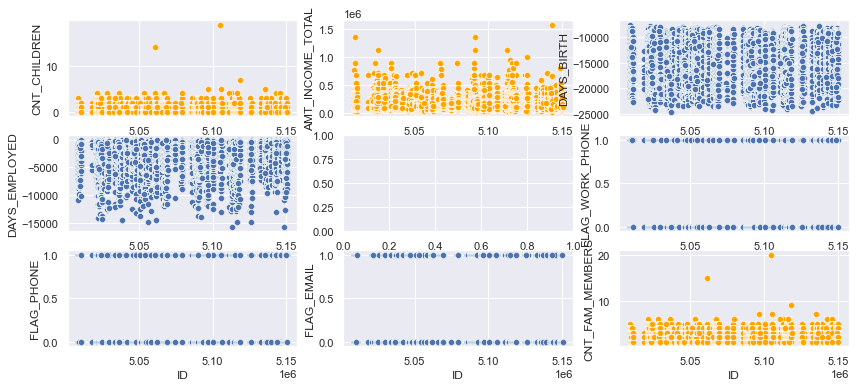

In [37]:
# Plotting scatterplot for numnerical variables in the dataset

fig, ax= plt.subplots(nrows= 3, ncols = 3, figsize= (14,6))

sns.scatterplot(x='ID', y='CNT_CHILDREN', data=cc_app_df, ax=ax[0][0], color= 'orange')
sns.scatterplot(x='ID', y='AMT_INCOME_TOTAL', data=cc_app_df, ax=ax[0][1], color='orange')
sns.scatterplot(x='ID', y='DAYS_BIRTH', data=cc_app_df, ax=ax[0][2])
sns.scatterplot(x='ID', y='DAYS_EMPLOYED', data=cc_app_df, ax=ax[1][0])
sns.scatterplot(x='ID', y='FLAG_WORK_PHONE', data=cc_app_df, ax=ax[1][2])
sns.scatterplot(x='ID', y='FLAG_PHONE', data=cc_app_df, ax=ax[2][0])
sns.scatterplot(x='ID', y='FLAG_EMAIL', data=cc_app_df, ax=ax[2][1])
sns.scatterplot(x='ID', y='CNT_FAM_MEMBERS', data=cc_app_df, ax=ax[2][2], color= 'orange')

There are outliers in 3 columns.

CNT_CHILDREN
AMT_INCOME_TOTAL
CNT_FAM_MEMBERS
We need to remove these outliers to make sure they do not affect our model results.
We will now remove these outliers.

In [38]:
# Removing outliers for CNT_CHILDREN COLUMN
q_hi = cc_app_df['CNT_CHILDREN'].quantile(0.999)
q_low = cc_app_df['CNT_CHILDREN'].quantile(0.001)
cc_app_df = cc_app_df[(cc_app_df['CNT_CHILDREN']>q_low) & (cc_app_df['CNT_CHILDREN']<q_hi)]

In [39]:
# Removing outliers for AMT_INCOME_TOTAL COLUMN
q_hi = cc_app_df['AMT_INCOME_TOTAL'].quantile(0.999)
q_low = cc_app_df['AMT_INCOME_TOTAL'].quantile(0.001)
cc_app_df= cc_app_df[(cc_app_df['AMT_INCOME_TOTAL']>q_low) & (cc_app_df['AMT_INCOME_TOTAL']<q_hi)]

In [40]:
# Removing outliers for CNT_FAM_MEMBERS COLUMN
q_hi = cc_app_df['CNT_FAM_MEMBERS'].quantile(0.999)
q_low = cc_app_df['CNT_FAM_MEMBERS'].quantile(0.001)
app= cc_app_df[(cc_app_df['CNT_FAM_MEMBERS']>q_low) & (cc_app_df['CNT_FAM_MEMBERS']<q_hi)]

In [41]:
# Removing outliers for DAYS_EMPLOYED COLUMN
q_hi = cc_app_df['DAYS_EMPLOYED'].quantile(0.999)
q_low = cc_app_df['DAYS_EMPLOYED'].quantile(0.001)
cc_app_df= cc_app_df[(cc_app_df['DAYS_EMPLOYED']>q_low) & (cc_app_df['DAYS_EMPLOYED']<q_hi)]

<AxesSubplot:xlabel='ID', ylabel='CNT_FAM_MEMBERS'>

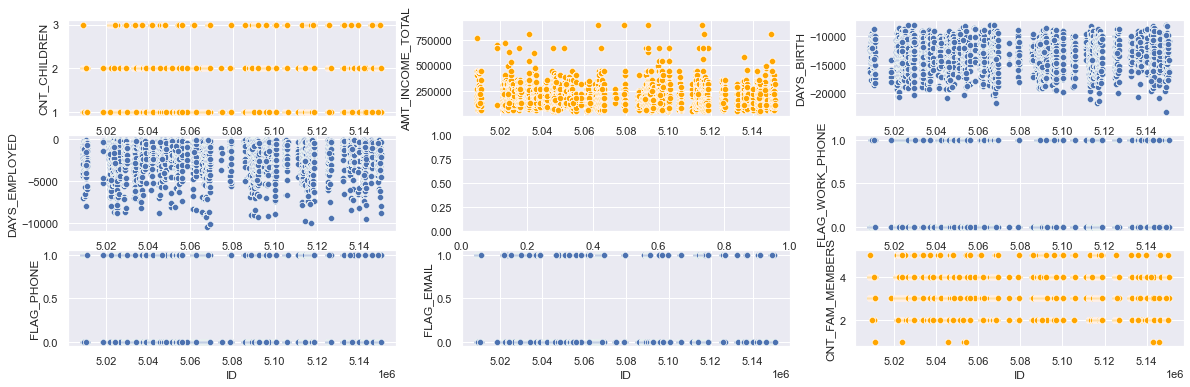

In [42]:
# Plotting scatterplot to check if outliers are removed

fig, ax= plt.subplots(nrows= 3, ncols = 3, figsize= (20,6))

sns.scatterplot(x='ID', y='CNT_CHILDREN', data=cc_app_df, ax=ax[0][0], color= 'orange')
sns.scatterplot(x='ID', y='AMT_INCOME_TOTAL', data=cc_app_df, ax=ax[0][1], color='orange')
sns.scatterplot(x='ID', y='DAYS_BIRTH', data=cc_app_df, ax=ax[0][2])
sns.scatterplot(x='ID', y='DAYS_EMPLOYED', data=cc_app_df, ax=ax[1][0])
# sns.scatterplot(x='ID', y='FLAG_MOBIL', data=cc_app_df, ax=ax[1][1])
sns.scatterplot(x='ID', y='FLAG_WORK_PHONE', data=cc_app_df, ax=ax[1][2])
sns.scatterplot(x='ID', y='FLAG_PHONE', data=cc_app_df, ax=ax[2][0])
sns.scatterplot(x='ID', y='FLAG_EMAIL', data=cc_app_df, ax=ax[2][1])
sns.scatterplot(x='ID', y='CNT_FAM_MEMBERS', data=cc_app_df, ax=ax[2][2], color= 'orange')

In [43]:
# Let’s visualize the target variable and have a look at how many approved and declined applications are there in our dataset.

In [44]:
cc_app_df['STATUS'].value_counts(normalize=True)

0    0.994056
1    0.005944
Name: STATUS, dtype: float64

In [45]:
cc_app_df['STATUS'].value_counts().sum()

114408

In [46]:
cc_app_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114408 entries, 486 to 777579
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   114408 non-null  float64
 1   CODE_GENDER          114408 non-null  object 
 2   FLAG_OWN_CAR         114408 non-null  object 
 3   FLAG_OWN_REALTY      114408 non-null  object 
 4   CNT_CHILDREN         114408 non-null  float64
 5   AMT_INCOME_TOTAL     114408 non-null  float64
 6   NAME_INCOME_TYPE     114408 non-null  object 
 7   NAME_EDUCATION_TYPE  114408 non-null  object 
 8   NAME_FAMILY_STATUS   114408 non-null  object 
 9   NAME_HOUSING_TYPE    114408 non-null  object 
 10  DAYS_BIRTH           114408 non-null  float64
 11  DAYS_EMPLOYED        114408 non-null  float64
 12  FLAG_WORK_PHONE      114408 non-null  float64
 13  FLAG_PHONE           114408 non-null  float64
 14  FLAG_EMAIL           114408 non-null  float64
 15  OCCUPATION_TYPE

In [47]:
# we will use labelencoder to convert all the categorial columns
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

In [48]:
cc_app_df['CODE_GENDER']= label_encoder.fit_transform(cc_app_df['CODE_GENDER'])
cc_app_df['FLAG_OWN_CAR']= label_encoder.fit_transform(cc_app_df['FLAG_OWN_CAR'])
cc_app_df['FLAG_OWN_REALTY']= label_encoder.fit_transform(cc_app_df['FLAG_OWN_REALTY'])
cc_app_df['NAME_INCOME_TYPE']= label_encoder.fit_transform(cc_app_df['NAME_INCOME_TYPE'])
cc_app_df['NAME_FAMILY_STATUS']= label_encoder.fit_transform(cc_app_df['NAME_FAMILY_STATUS'])
cc_app_df['NAME_HOUSING_TYPE']= label_encoder.fit_transform(cc_app_df['NAME_HOUSING_TYPE'])
cc_app_df['NAME_EDUCATION_TYPE']= label_encoder.fit_transform(cc_app_df['NAME_EDUCATION_TYPE'])

In [49]:
cc_app_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,Age,YEARS_EMPLOYED
486,5008836.0,1,1,1,3.0,270000.0,4,4,1,1,...,-1163.0,0.0,0.0,0.0,Laborers,5.0,-8.0,0,34.0,3.0
487,5008836.0,1,1,1,3.0,270000.0,4,4,1,1,...,-1163.0,0.0,0.0,0.0,Laborers,5.0,-9.0,0,34.0,3.0
488,5008836.0,1,1,1,3.0,270000.0,4,4,1,1,...,-1163.0,0.0,0.0,0.0,Laborers,5.0,-10.0,0,34.0,3.0
489,5008836.0,1,1,1,3.0,270000.0,4,4,1,1,...,-1163.0,0.0,0.0,0.0,Laborers,5.0,-11.0,0,34.0,3.0
490,5008836.0,1,1,1,3.0,270000.0,4,4,1,1,...,-1163.0,0.0,0.0,0.0,Laborers,5.0,-12.0,0,34.0,3.0


In [52]:
#Minmaxscalar
# perform a robust scaler transform of the dataset
scaler = MinMaxScaler()
cc_app_df[['AMT_INCOME_TOTAL','DAYS_EMPLOYED','MONTHS_BALANCE']] = scaler.fit_transform(cc_app_df[['AMT_INCOME_TOTAL','DAYS_EMPLOYED','MONTHS_BALANCE']])
# convert the array back to a dataframe
cc_app_df = DataFrame(cc_app_df)
print(cc_app_df.describe())

                 ID    CODE_GENDER   FLAG_OWN_CAR  FLAG_OWN_REALTY  \
count  1.144080e+05  114408.000000  114408.000000    114408.000000   
mean   5.079510e+06       0.409456       0.465352         0.656396   
std    4.199169e+04       0.491736       0.498800         0.474913   
min    5.008836e+06       0.000000       0.000000         0.000000   
25%    5.042262e+06       0.000000       0.000000         0.000000   
50%    5.079136e+06       0.000000       0.000000         1.000000   
75%    5.116002e+06       1.000000       1.000000         1.000000   
max    5.150485e+06       1.000000       1.000000         1.000000   

        CNT_CHILDREN  AMT_INCOME_TOTAL  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
count  114408.000000     114408.000000     114408.000000        114408.000000   
mean        1.375306          0.171643          2.704304             3.014352   
std         0.556218          0.118036          1.751556             1.378561   
min         1.000000          0.000000       

In [53]:
#  Train & Test split
x_train, x_test, y_train, y_test = train_test_split( cc_app_df[['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE','AMT_INCOME_TOTAL','DAYS_EMPLOYED','MONTHS_BALANCE']],
                                                 cc_app_df['STATUS'],test_size=0.20,
                                                    random_state=21)

print('Shape of Training X:{}'.format(x_train.shape))
print('Shape of Test X:{}'.format(x_test.shape))
print('Shape of Training y:{}'.format(y_train.shape))
print('Shape of Test y:{}'.format(y_test.shape))

Shape of Training X:(91526, 10)
Shape of Test X:(22882, 10)
Shape of Training y:(91526,)
Shape of Test y:(22882,)


# Model 1

**Logistic Regression Model**

In [54]:
# Build Logistic Regression Model
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [55]:
#testing the linear regression model
score=model.score(x_test,y_test)

In [56]:
# Model diagnostic
print(score)

0.9939690586487195


In [57]:
#Accuracy score
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_pred)))

Accuracy Score is 0.99397


In [58]:
#Confusion Matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
cnf_matrix

array([[22744,     0],
       [  138,     0]], dtype=int64)

Text(0.5, 30.5, 'Predicted Values')

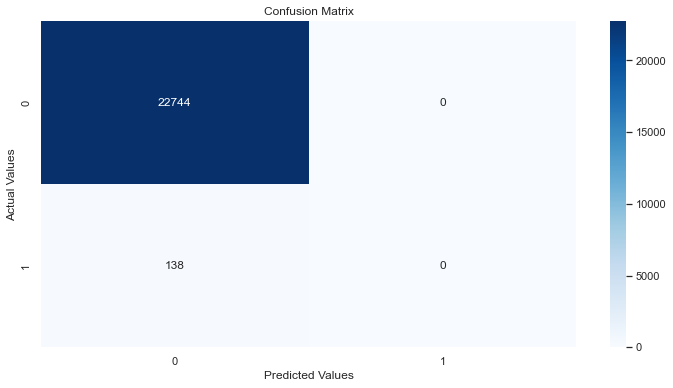

In [59]:
# Making the Confusion Matrix
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")

In [60]:
# Creating a classification report for the model
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     22744
           1       0.00      0.00      0.00       138

    accuracy                           0.99     22882
   macro avg       0.50      0.50      0.50     22882
weighted avg       0.99      0.99      0.99     22882



# Other models

In [61]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

**RandomForestClassifier**

Accuracy Score is 0.99397
       0  1
0  22744  0
1    138  0
[[22744     0]
 [  138     0]]


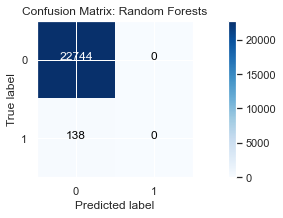

In [62]:
# RandomForestClassifier
model = RandomForestClassifier(n_estimators=250,
                              max_depth=8,
                              min_samples_leaf=16
                              )
# model.fit(X_train, y_train)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      classes=['0','1'],
                      title='Confusion Matrix: Random Forests')

**KNN Classification**

0.9920461498120794
[[22652    92]
 [   90    48]]


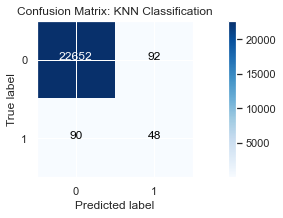

In [63]:
#KNN Classification
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(knn.score(x_test, y_test))
confusion_matrix(y_test, y_pred)

plot_confusion_matrix(confusion_matrix(y_test,y_pred),
                      classes=['0','1'],
                      title='Confusion Matrix: KNN Classification')

**DecisionTreeClassifier**

Accuracy 0.9932261165981995
[[22687    57]
 [   98    40]]


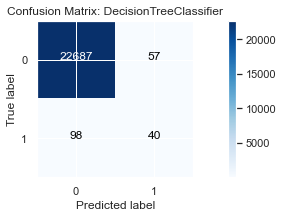

In [64]:
# DecisionTreeClassifier()
DT_model = DecisionTreeClassifier()
DT_model.fit(x_train, y_train)
y_pred = DT_model.predict(x_test)
print("Accuracy", accuracy_score(y_test, y_pred))

plot_confusion_matrix(confusion_matrix(y_test,y_pred),
                      classes=['0','1'],
                      title='Confusion Matrix: DecisionTreeClassifier')

**XGBoost classifier**

Accuracy 0.9932261165981995
[[22687    57]
 [   98    40]]


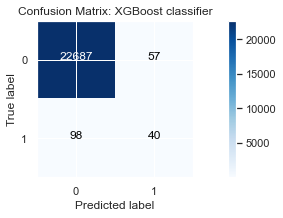

In [65]:
#XGBoost classifier
XGB_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
XGB_model.fit(x_train, y_train)
y_pred = DT_model.predict(x_test)
print("Accuracy", accuracy_score(y_test, y_pred))

plot_confusion_matrix(confusion_matrix(y_test,y_pred),
                      classes=['0','1'],
                      title='Confusion Matrix: XGBoost classifier')


All the models deployed above are giving good accuracy. However, Logistic Regression and RandomForestClassifier yields best score compared to other models. So, running a gridsearch to decide the best model.

In [66]:
# model selection

from sklearn.pipeline import Pipeline

pipe=Pipeline([("classifier", RandomForestClassifier())])

search_space=[{"classifier": [LogisticRegression()], 
               "classifier__penalty":['l2'], 
               "classifier__C": np.logspace(0,4,10)}, 
              {"classifier": [RandomForestClassifier()], 
                "classifier__n_estimators":[10,100,250,1000], 
                 "classifier__max_features":[1,2,3]}]

# Grid search to obtain the best model

clf = GridSearchCV(pipe, search_space, cv=5, verbose=0, n_jobs = -1)
best_model = clf.fit(x_train, y_train)
print(best_model.best_estimator_.get_params()["classifier"])

print("Best params\n",clf.best_params_)

LogisticRegression()
Best params
 {'classifier': LogisticRegression(), 'classifier__C': 1.0, 'classifier__penalty': 'l2'}


Best model for this dataset to predict credit card approval prediction is Logistic Regression with the accuracy of 99.4%